## **Modeling and prediction: Linear Regression**


---


**HAZIRLAYANLAR**

* EZGİ GÜMÜŞTEKİN

* EMİR YORGUN



---


* *Ev almak isteyenler, aradıkları kriterlere göre ne kadar bütçeye sahip olmaları gerektiğini nasıl bilebilir?*
* *Peki, evini satmak isteyenler, sahip oldukları evin piyasa fiyatının değerini nasıl bilebilir?*

***Bu projede yukarıdaki iki soruya cevap arıyor olacağız.*** 



---

*Makine öğrenmesinin Doğrusal(Lineer) Regresyon yöntemini kullanmayı tercih ettik.*

***Ama Neden?***

*Doğrusal regresyon, ilgili ve bilinen başka bir veri değeri kullanarak bilinmeyen verilerin değerini tahmin eden bir veri analizi tekniğidir. Bilinmeyen veya bağımlı değişkeni ve bilinen veya bağımsız değişkeni doğrusal bir denklem olarak matematiksel olarak modeller. Örneğin, geçen yılki harcamalarınız ve geliriniz hakkında verileriniz olduğunu varsayalım. Doğrusal regresyon teknikleri bu verileri analiz eder ve giderlerinizin gelirinizin yarısı olduğunu belirler. Daha sonra gelecekteki bilinen bir geliri yarıya indirerek bilinmeyen bir gelecekteki gideri hesaplarlar.*


---



***Proje süresince uygulayacağımız yol haritası aşağıdaki gibidir***

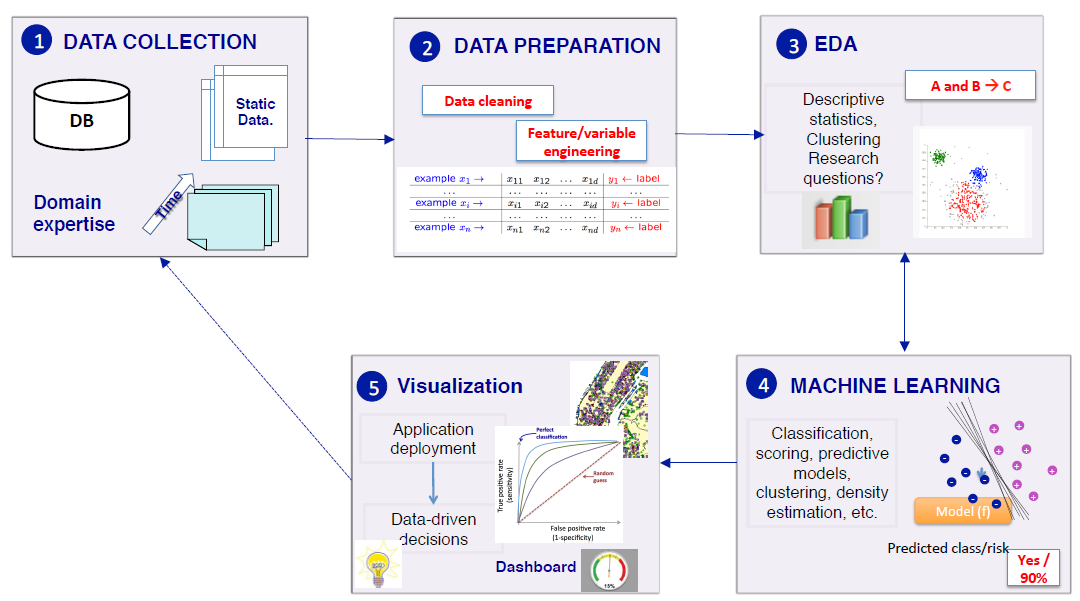

***Gerekli kütüphanelerin kurulumu***

In [1]:
import numpy as np
import pandas as pd

#istatistiksel veri görselleştirme kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

#makine öğrenmesi için gerekli kütüphanelerin kurulması
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

***Veri***

*Pandas kütüphanesi yardımıyla veri Github platformundan alındı ve içeriği işlenmek üzere analiz edildi*

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hootbu/HousePricing_LinearRegression/main/HousePricing_DataSet.csv')

*Dataset içerisindeki verilerin karşılıkları:*

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

***Veri Analizi***

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1457, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1457 non-null   int64  
 1   MSSubClass     1457 non-null   int64  
 2   MSZoning       1457 non-null   object 
 3   LotFrontage    1198 non-null   float64
 4   LotArea        1457 non-null   int64  
 5   Street         1457 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1457 non-null   object 
 8   LandContour    1457 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1457 non-null   object 
 11  LandSlope      1457 non-null   object 
 12  Neighborhood   1457 non-null   object 
 13  Condition1     1457 non-null   object 
 14  Condition2     1457 non-null   object 
 15  BldgType       1457 non-null   object 
 16  HouseStyle     1457 non-null   object 
 17  OverallQual    1457 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1457.0,730.383665,422.018542,1.0,365.0,730.0,1096.0,1460.0
MSSubClass,1457.0,56.918325,42.332924,20.0,20.0,50.0,70.0,190.0
LotFrontage,1198.0,70.015860,24.270763,21.0,59.0,69.0,80.0,313.0
LotArea,1457.0,10478.113246,9923.352257,1300.0,7540.0,9473.0,11600.0,215245.0
OverallQual,1457.0,6.093342,1.377634,1.0,5.0,6.0,7.0,10.0
OverallCond,1457.0,5.575841,1.113685,1.0,5.0,5.0,6.0,9.0
YearBuilt,1457.0,1971.204530,30.200441,1872.0,1954.0,1972.0,2000.0,2010.0
YearRemodAdd,1457.0,1984.829101,20.648957,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1449.0,102.151829,177.751640,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,1457.0,441.080988,452.775698,0.0,0.0,381.0,708.0,5644.0


**Exploratory Data Analysis(EDA)**

*Özet istatistikler ve grafikler yardımıyla verileri keşfetmek, anormallikleri tespit etmek için veriler üzerinde ilk araştırmaları uygulamaya denir*

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


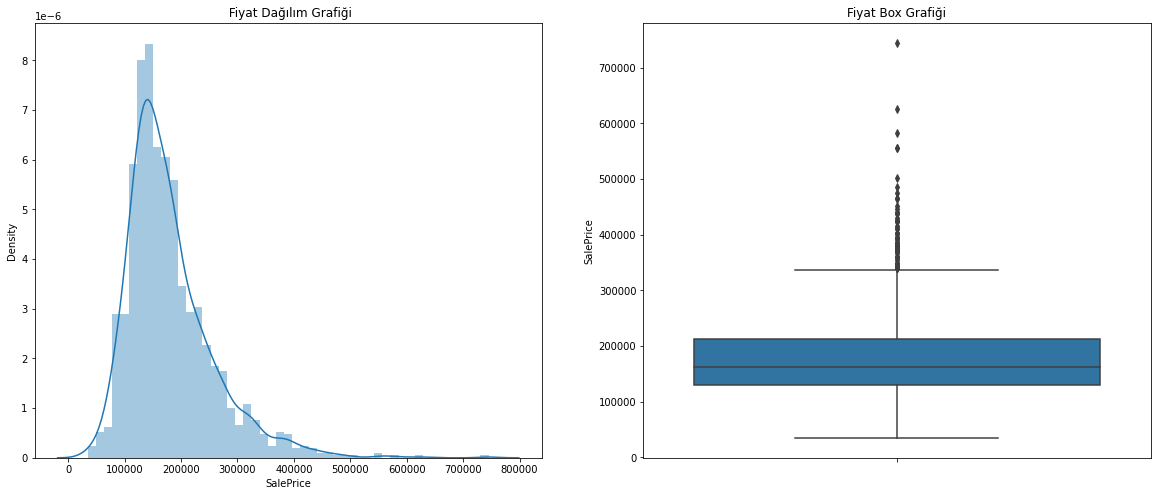

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title(' Fiyat Dağılım Grafiği')
sns.distplot(df.SalePrice)

plt.subplot(1,2,2)
plt.title('Fiyat Box Grafiği')
sns.boxplot(y=df.SalePrice)

plt.show()

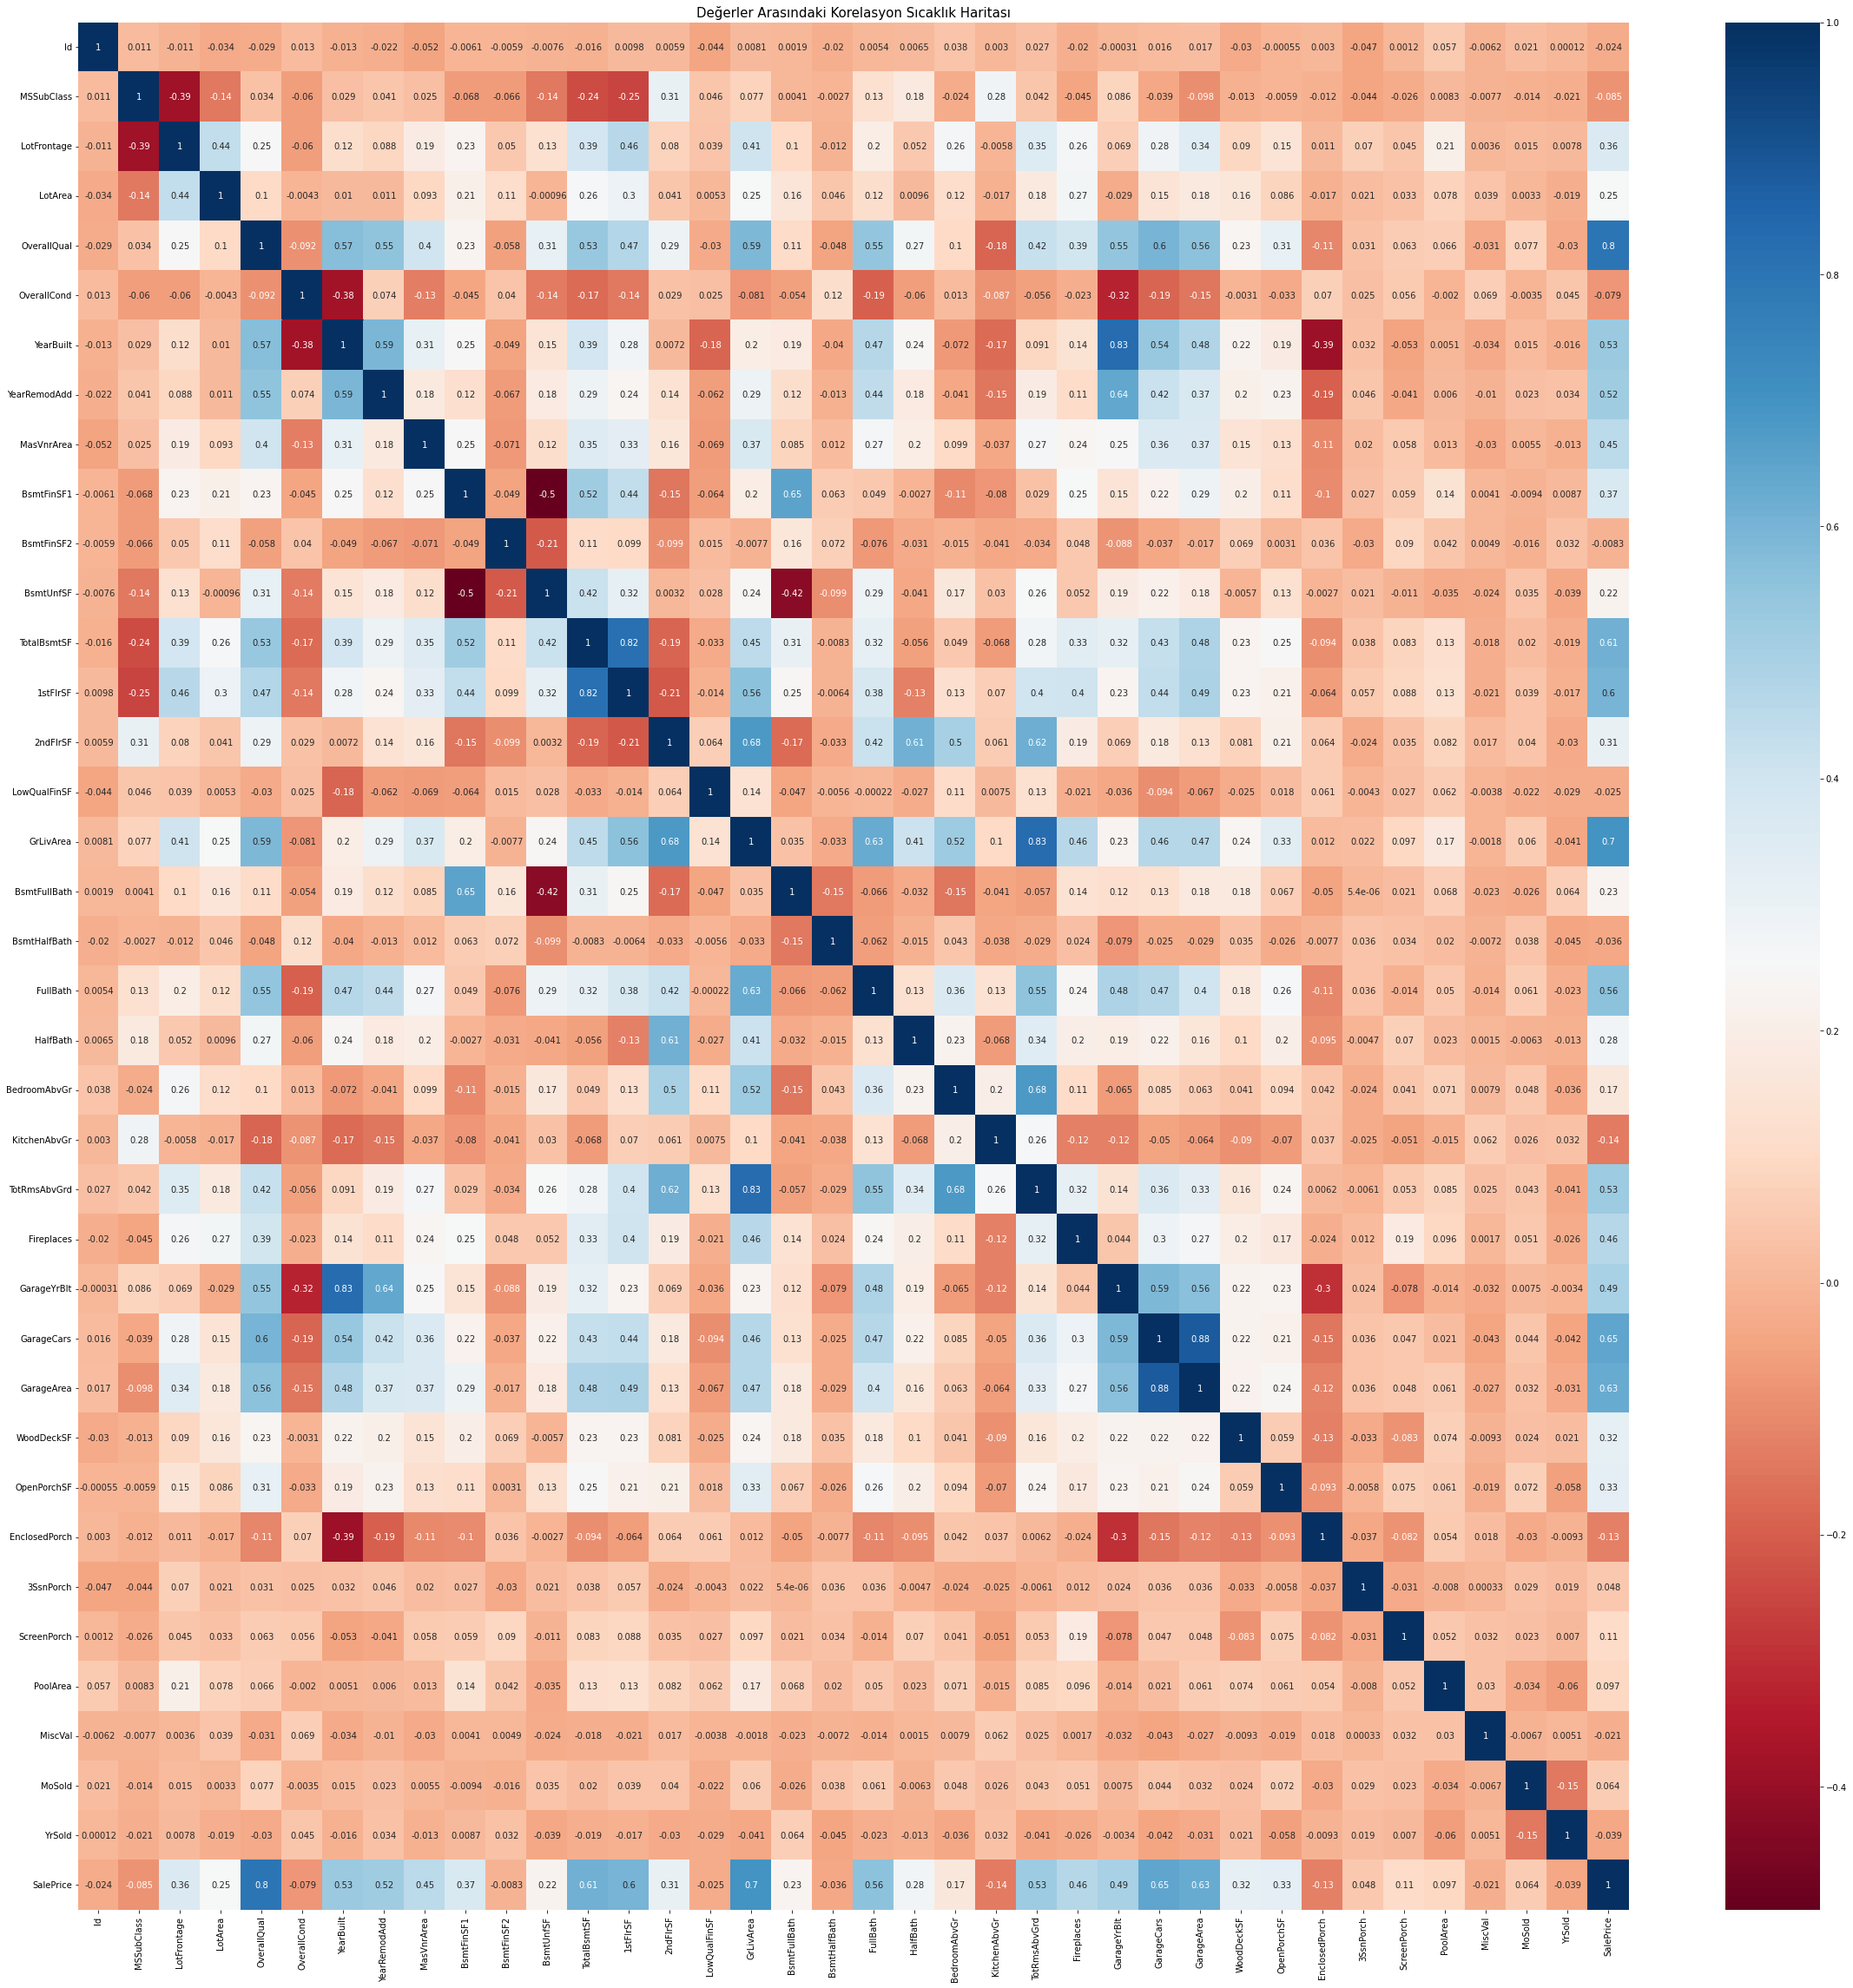

In [8]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.title("Değerler Arasındaki Korelasyon Sıcaklık Haritası", size=15)
plt.show()

*Yukarıdaki sıcaklık haritasında verilerin birbiri ile korelasyonu gözlemlenmiştir. Bu gözlemler sonucunda **SalePrice** ile korelasyon değeri az olan verileri çıkarma kararı alınmıştır.*

*Korelasyon = İki değişken arasındaki ilişkinin yönünü ve gücünü belirtir.*

In [9]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index) #fiyatı etkileyen değerler
object_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]  #fiyatı etkileyen objeler
important_cols = important_num_cols + object_cols

df = df[important_cols]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1457 non-null   int64 
 1   YearBuilt      1457 non-null   int64 
 2   YearRemodAdd   1457 non-null   int64 
 3   TotalBsmtSF    1457 non-null   int64 
 4   1stFlrSF       1457 non-null   int64 
 5   GrLivArea      1457 non-null   int64 
 6   FullBath       1457 non-null   int64 
 7   TotRmsAbvGrd   1457 non-null   int64 
 8   GarageCars     1457 non-null   int64 
 9   GarageArea     1457 non-null   int64 
 10  SalePrice      1457 non-null   int64 
 11  MSZoning       1457 non-null   object
 12  Utilities      1457 non-null   object
 13  BldgType       1457 non-null   object
 14  Heating        1457 non-null   object
 15  KitchenQual    1457 non-null   object
 16  SaleCondition  1457 non-null   object
 17  LandSlope      1457 non-null   object
dtypes: int64(11), object(7)
memo

***X, Y olarak verilerin bölünmesi***

*SalePrice değişkeni dışındaki değerler bağımsız değişken olurken SalePrice, onların değerlerine göre değişkenlik gösterdiği için bağımlı değişken olarak adlandırılır.*

In [11]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

MSZoning gibi obje verilerinin içindeki benzersiz değerlerin incelenmesi

In [12]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

*Yukarıda gördüğümüz MSZoning object verisini lineer regresyon ile işleyebilmek için One-Hot Encoding yöntemini kullanmayı tercih ettik*

***One-Hot Encoding***

*Veri türü object olanları lineer regresyon işlemine sokabilmek için bu yöntem kullanıldı. Bu yöntem sayesinde object olan verinin içerisindeki benzersiz değerler ayrı sütunlara ayrılarak tabloya eklendi ve 1-0 gibi değerler verilerek işlem içerisindeki varlıkları belirtildi*

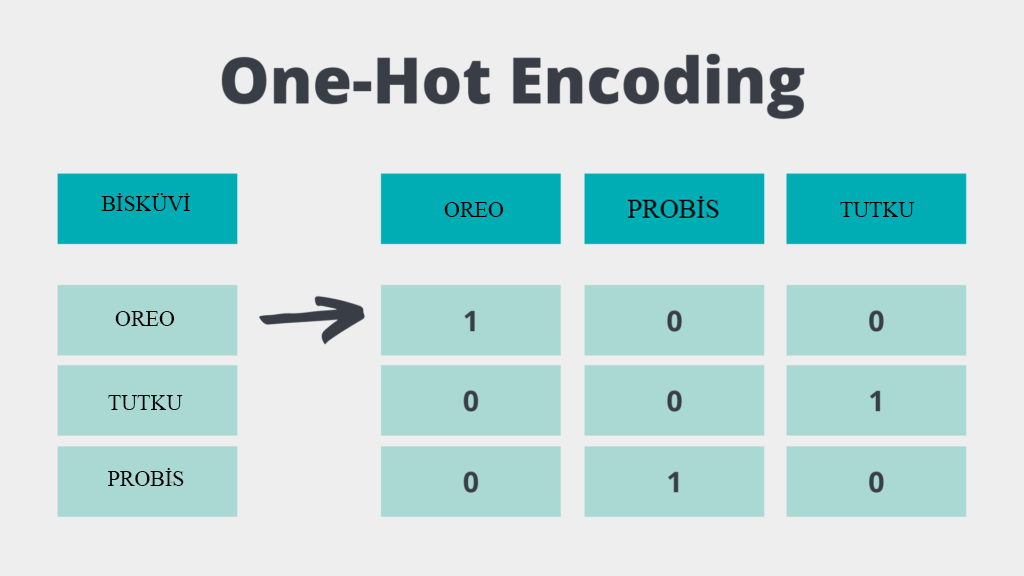

In [13]:
X = pd.get_dummies(X, columns=object_cols)

*One-Hot Encoding ve .get_dummies() sayesinde sütun sayısı 18'den 41'e yükseldi.*

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   OverallQual            1457 non-null   int64
 1   YearBuilt              1457 non-null   int64
 2   YearRemodAdd           1457 non-null   int64
 3   TotalBsmtSF            1457 non-null   int64
 4   1stFlrSF               1457 non-null   int64
 5   GrLivArea              1457 non-null   int64
 6   FullBath               1457 non-null   int64
 7   TotRmsAbvGrd           1457 non-null   int64
 8   GarageCars             1457 non-null   int64
 9   GarageArea             1457 non-null   int64
 10  MSZoning_C (all)       1457 non-null   uint8
 11  MSZoning_FV            1457 non-null   uint8
 12  MSZoning_RH            1457 non-null   uint8
 13  MSZoning_RL            1457 non-null   uint8
 14  MSZoning_RM            1457 non-null   uint8
 15  Utilities_AllPub       1457 non-null  

***Hold-Out Method***

*Veri setinin 80 Train/20 Test oranında bölünmesi işlemi*

*Oran test_size ile belirlenir*

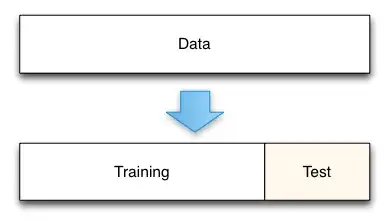

***NEDEN? RANDOM_STATE = 52***

*Random_state parametesine bir değer verilmezse sistem her çalıştırıldığında random bir şekilde veriyi train ve test olarak olarak böler. Eğer sabit bir sayı verilirse (örn: 52,23,42,0,31...) random değer havuzu içerisinden her seferinde aynı değeri seçer ve aynı şekilde datayı böler.*

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

**Lineer Regresyon**

In [16]:
model = LinearRegression()

*Train değerleri yardımıyla modelin eğitilmesi .fit() fonksiyonu yardımıyla yapılır*

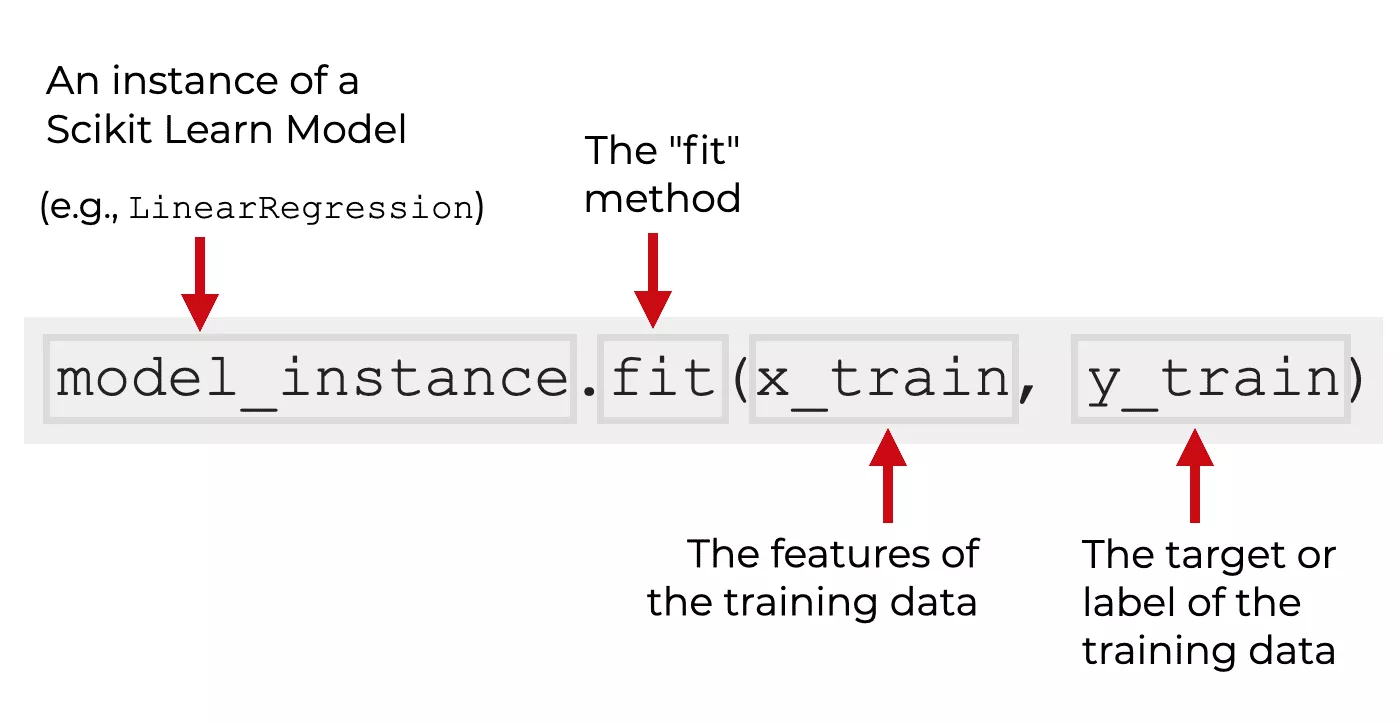

In [17]:
model.fit(X_train, y_train)

LinearRegression()

*.predict() fonskiyonu sayesinde X_test datasına göre modelin tahmin oluşturması*

In [18]:
predictions = model.predict(X_test)

***Kullanılan regresyon metrikleri: R-SQUARED(R2), MEAN SQUARED ERROR(MSE) ve ROOT MEAN SQUARED ERROR(RMSE)***

*R-SQUARED: Tahminimizin modele ne kadar uyum sağladığının oranıdır. 1'e yaklaştıkça doğruluk oranı daha çok artar. 0.12'den aşağı değerler başarısız model sayılırken, 0'ın altı değerler underfitting sayılmaktadır.*

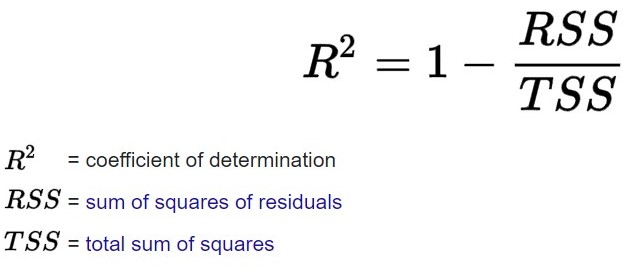

*MEAN SQUARED ERROR(MSE): Hataların karelerinin ortalamasıdır. Regresyon doğrusuyla data noktalarının aralarındaki uzaklığın karesini alır ve kaç tane nokta varsa o sayıya böler. Düşük MSE değeri daha iyidir.*

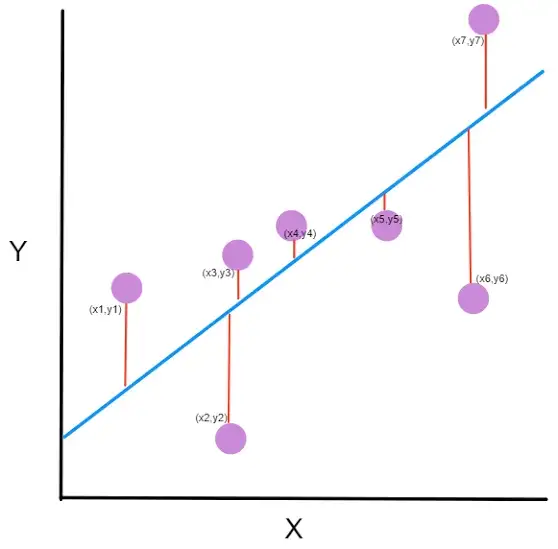

*ROOT MEAN SQUARED ERROR(RMSE): MSE değerinin kareköküdür. MSE değeri çok büyük çıkarsa onun yerine kullanılır. Böylece yorumlamayı kolaylaştırır.*

In [19]:
def evaluation(y, predictions):
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mse, r_squared

In [20]:
mse, r_squared = evaluation(y_test, predictions)
print('MSE Skoru: %.2f' % mse)
print('R2 Skoru: %.2f' % r_squared)
print('RMSE Skoru: %.2f' % np.sqrt(mse))

MSE Skoru: 887770970.94
R2 Skoru: 0.87
RMSE Skoru: 29795.49


Text(0.5, 0, 'Gerçek Değerler')

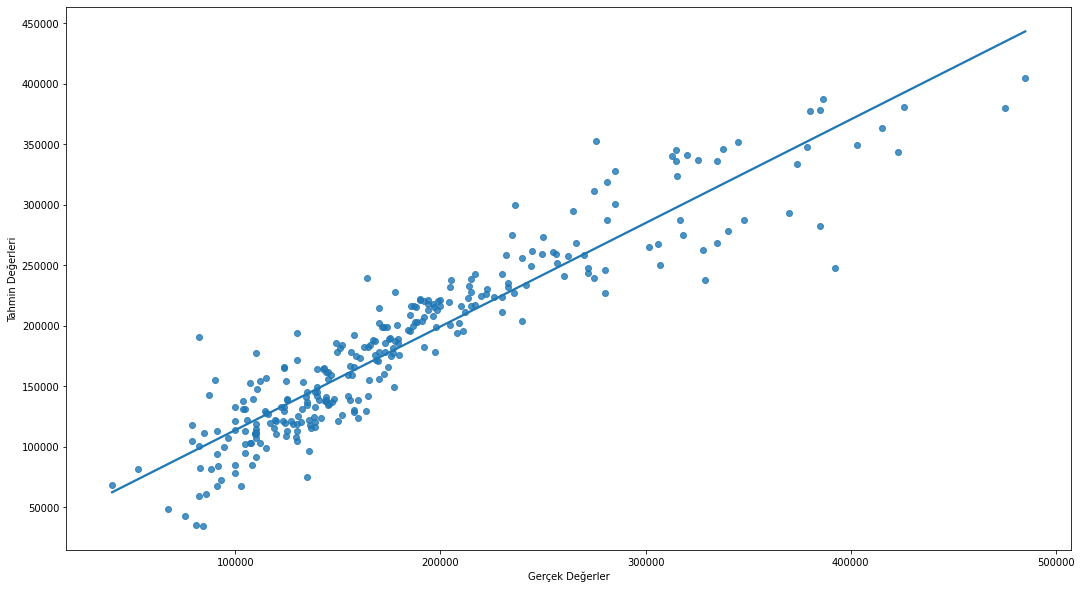

In [21]:
plt.figure(figsize=(18,10))
plt.ylabel('Tahmin Değerleri')
sns.regplot(x= y_test, y= predictions,data=df, ci=None)
plt.xlabel('Gerçek Değerler')

**KAYNAKÇA**

[1] https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

[2] https://www.youtube.com/watch?v=R15LjD8aCzc

[3] https://suleakcaycs.medium.com/makine-öğrenmesi-ii-e06827ccc1a6

[4] https://medium.com/deep-learning-turkiye/regresyon-ve-sınıflandırmada-hata-metrikleri-143a40c6b656

[5] https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

[6] https://github.com/hootbu/DataSetss

[7] https://aws.amazon.com/tr/what-is/linear-regression/